In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()

data = pd.read_csv('data.csv')

print("top 5 rows of the data:")
print(data.head())

print("last 5 rows of the data:")
print(data.tail())

Saving data.csv to data.csv
top 5 rows of the data:
  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory 

In [5]:
print("checking data types of each column:")
print(data.dtypes)

checking data types of each column:
Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object


In [6]:
columns_to_drop = ['Engine Fuel Type', 'Market Category', 'Vehicle Style','Popularity', 'Number of Doors', 'Vehicle Size']

data = data.drop(columns=columns_to_drop)

print("top 5 rows after dropping:")
print(data.head())

top 5 rows after dropping:
  Make       Model  Year  Engine HP  Engine Cylinders Transmission Type  \
0  BMW  1 Series M  2011      335.0               6.0            MANUAL   
1  BMW    1 Series  2011      300.0               6.0            MANUAL   
2  BMW    1 Series  2011      300.0               6.0            MANUAL   
3  BMW    1 Series  2011      230.0               6.0            MANUAL   
4  BMW    1 Series  2011      230.0               6.0            MANUAL   

      Driven_Wheels  highway MPG  city mpg   MSRP  
0  rear wheel drive           26        19  46135  
1  rear wheel drive           28        19  40650  
2  rear wheel drive           28        20  36350  
3  rear wheel drive           28        18  29450  
4  rear wheel drive           28        18  34500  


In [7]:
rename_columns = {'Engine HP': 'HP', 'Engine Cylinders': 'Cylinders', 'Transmission Type': 'Transmission', 'Driven_Wheels': 'Drive Mode', 'highway MPG': 'MPG-H', 'city mpg': 'MPG-C', 'MSRP': 'Price'}

data = data.rename(columns=rename_columns)

print("top 5 rows after renaming the columns:")
print(data.head())

top 5 rows after renaming the columns:
  Make       Model  Year     HP  Cylinders Transmission        Drive Mode  \
0  BMW  1 Series M  2011  335.0        6.0       MANUAL  rear wheel drive   
1  BMW    1 Series  2011  300.0        6.0       MANUAL  rear wheel drive   
2  BMW    1 Series  2011  300.0        6.0       MANUAL  rear wheel drive   
3  BMW    1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   
4  BMW    1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   

   MPG-H  MPG-C  Price  
0     26     19  46135  
1     28     19  40650  
2     28     20  36350  
3     28     18  29450  
4     28     18  34500  


In [8]:
print("original shape:")
print(data.shape)

print("Number of duplicate rows:")
print(data.duplicated().sum())

data = data.drop_duplicates()

print("\nnew shape")
print(data.shape)

original shape:
(11914, 10)
Number of duplicate rows:
989

new shape
(10925, 10)


In [9]:
print("Statistical Summary:")
numerical_data = data.select_dtypes(include=np.number)

for column in numerical_data.columns:
    print(f"\nStatistics for {column}:")
    print(f"Sum: {data[column].sum()}")
    print(f"Mean: {data[column].mean()}")
    print(f"Standard Deviation: {data[column].std()}")
    print(f"Minimum: {data[column].min()}")
    print(f"25th Percentile: {data[column].quantile(0.25)}")
    print(f"Median: {data[column].median()}")
    print(f"75th Percentile: {data[column].quantile(0.75)}")
    print(f"Maximum: {data[column].max()}")

Statistical Summary:

Statistics for Year:
Sum: 21969278
Mean: 2010.917894736842
Standard Deviation: 7.016101633326255
Minimum: 1990
25th Percentile: 2007.0
Median: 2015.0
75th Percentile: 2016.0
Maximum: 2017

Statistics for HP:
Sum: 2761761.0
Mean: 254.39950257921888
Standard Deviation: 109.77135080313673
Minimum: 55.0
25th Percentile: 173.0
Median: 240.0
75th Percentile: 303.0
Maximum: 1001.0

Statistics for Cylinders:
Sum: 61755.0
Mean: 5.6681964203763195
Standard Deviation: 1.7994636937325212
Minimum: 0.0
25th Percentile: 4.0
Median: 6.0
75th Percentile: 6.0
Maximum: 16.0

Statistics for MPG-H:
Sum: 291203
Mean: 26.65473684210526
Standard Deviation: 9.03110935761823
Minimum: 12
25th Percentile: 22.0
Median: 25.0
75th Percentile: 30.0
Maximum: 354

Statistics for MPG-C:
Sum: 215996
Mean: 19.770800915331808
Standard Deviation: 9.259531915670784
Minimum: 7
25th Percentile: 16.0
Median: 18.0
75th Percentile: 22.0
Maximum: 137

Statistics for Price:
Sum: 464275308
Mean: 42496.595697940

In [10]:
print("missing values before cleaning:")
print(data.isnull().sum())

data_new = data.dropna()

print("missing values after cleaning:")
print(data_new.isnull().sum())

missing values before cleaning:
Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64
missing values after cleaning:
Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


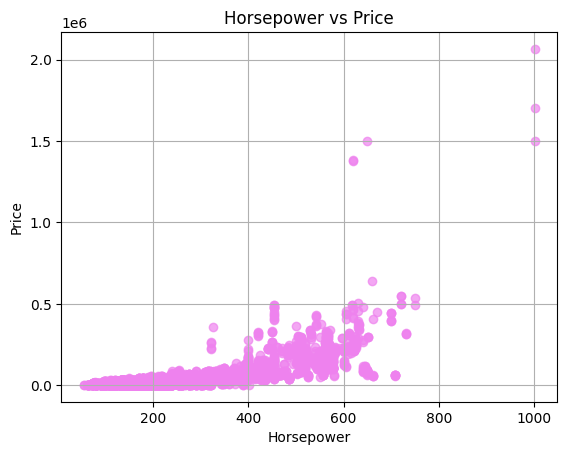

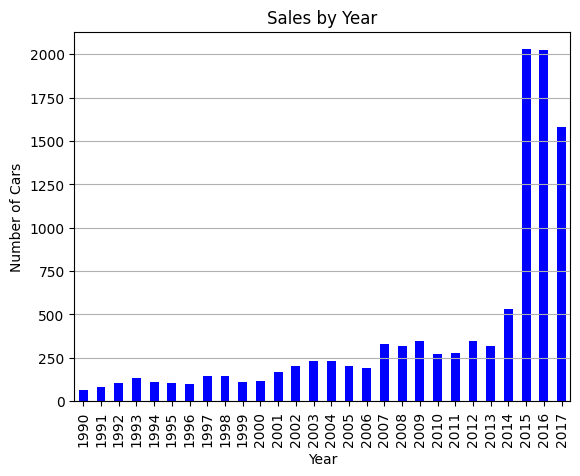

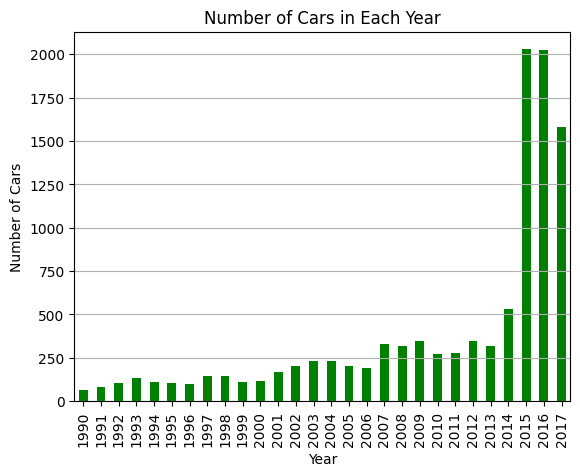

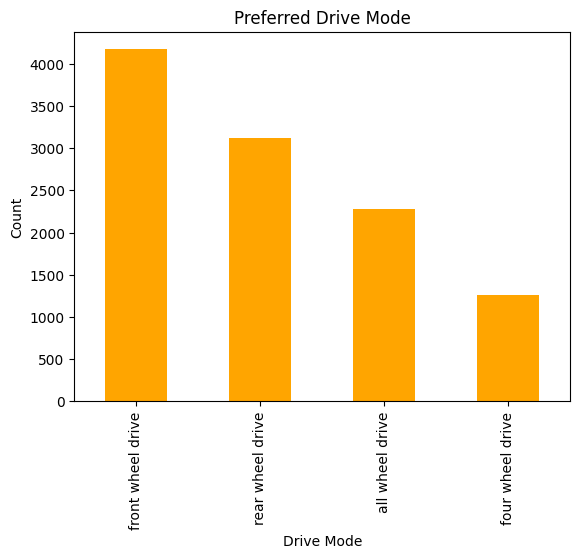

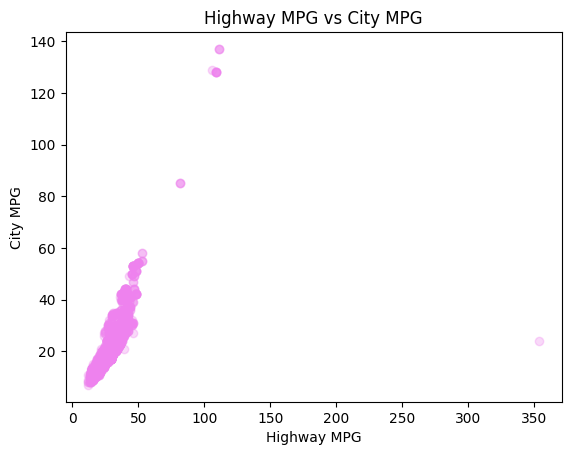

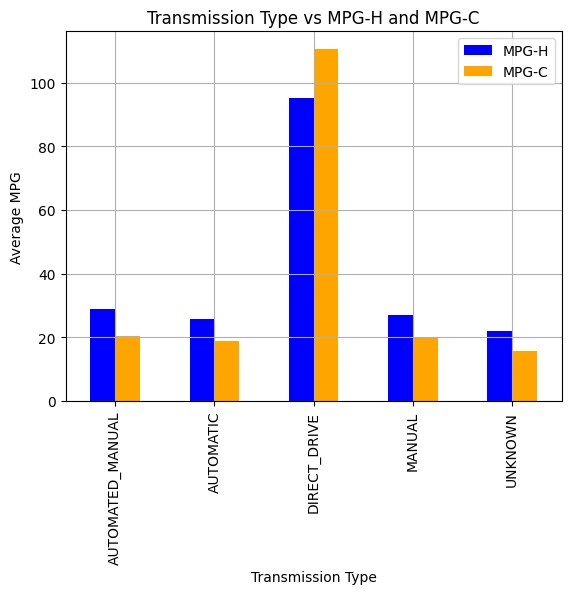

In [16]:
plt.scatter(data_new['HP'], data_new['Price'], alpha=0.7, color='violet')
plt.title('Horsepower vs Price')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.grid(True)
plt.show()

data_new['Year'].value_counts().sort_index().plot(kind='bar', color='blue')
plt.title('Sales by Year')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.grid(axis='y')
plt.show()

data_new['Year'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Number of Cars in Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.grid(axis='y')
plt.show()

data_new['Drive Mode'].value_counts().plot(kind='bar', color='orange')
plt.title('Preferred Drive Mode')
plt.xlabel('Drive Mode')
plt.ylabel('Count')
plt.show()

plt.scatter(data_new['MPG-H'], data_new['MPG-C'], alpha=0.3, color='violet')
plt.title('Highway MPG vs City MPG')
plt.xlabel('Highway MPG')
plt.ylabel('City MPG')
plt.show()

transmission = data_new.groupby('Transmission')[['MPG-H', 'MPG-C']].mean()
transmission.plot(kind='bar', color=['blue', 'orange'])
plt.title("Transmission Type vs MPG-H and MPG-C")
plt.xlabel("Transmission Type")
plt.ylabel("Average MPG")
plt.grid()
plt.show()

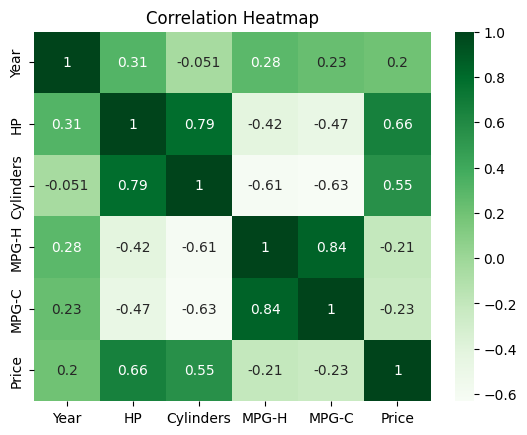

In [13]:
numeric_data = data_new.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Greens')
plt.title("Correlation Heatmap")
plt.show()